# STAR
- Has its roots in the CenSure keypoint detector
- [Paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/agrawal_2008.pdf)
- Approximates DoG for increased speed.
- used to detect “blob”-like regions in images.

## How it works.
- Approximation is accomplished by the CenSurE keypoint detector using octagon box filters and integral images for added speed, where we take the sum of pixel intensities inside the following three regions of an area surrounding a given (x, y)-coordinate
- Using these regions, we can construct “inner” and “outer” regions surrounding the keypoints. The below figure shows the inner and outer radii, respectively
- We simply compute the difference between inner and outer regions, yielding corner-like and “blob”-like regions of an image.
- An extension to the CenSurE keypoint detector is the STAR keypoint detector

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import create_subplot, display_image

In [3]:
args = {
    "image":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg"
}

In [4]:
def keypoint_detect(imagePath):
    #load and convert image to grayscale
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect STAR keypoints in the image for OpenCV 2.4
    detector = cv2.xfeatures2d.StarDetector_create()
    kps = detector.detect(gray)

    print("# of keypoints: {}".format(len(kps)))

    # loop over the keypoints and draw them
    for kp in kps:
        r = int(0.5 * kp.size)
        (x, y) = np.int0(kp.pt)
        cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
    display_image("Images", np.hstack([orig, image]))

# of keypoints: 174


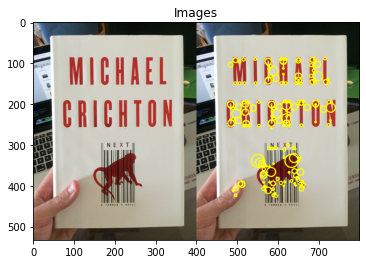

In [5]:
keypoint_detect(imagePath=args["image"])

# of keypoints: 24


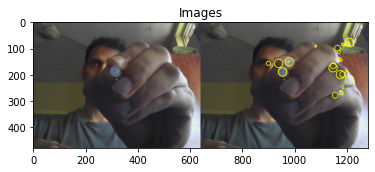

In [6]:
keypoint_detect(imagePath=args["pen"])